In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv(r"C:\Users\Sahil\OneDrive\Documents\fake_or_real_news.csv")

In [80]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [82]:
df.shape

(6335, 4)

In [83]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [86]:
import nltk

In [87]:
df['num_chr']=df['title'].apply(len)

In [88]:
df.head(2)

,Unnamed: 0,title,text,label,num_chr
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85


In [89]:
df['num_words'] = df['title'].apply(lambda x:len(nltk.word_tokenize(x)))

In [90]:
df.head(2)

,Unnamed: 0,title,text,label,num_chr,num_words
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,16


<Axes: xlabel='num_chr', ylabel='Count'>

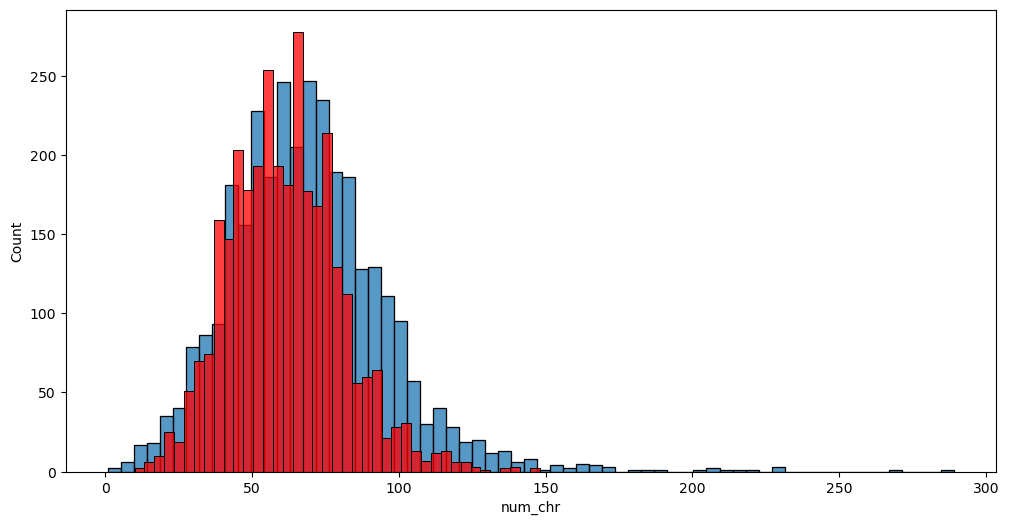

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']=='FAKE']['num_chr'])
sns.histplot(df[df['label']=='REAL']['num_chr'] , color= 'r')

<Axes: xlabel='num_words', ylabel='Count'>

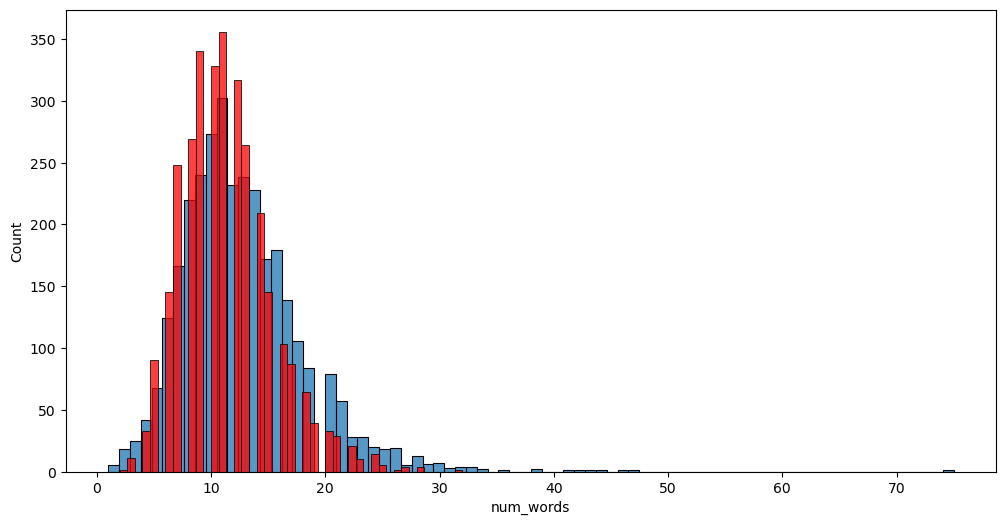

In [92]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']=='FAKE']['num_words'])
sns.histplot(df[df['label']=='REAL']['num_words'] , color= 'r')

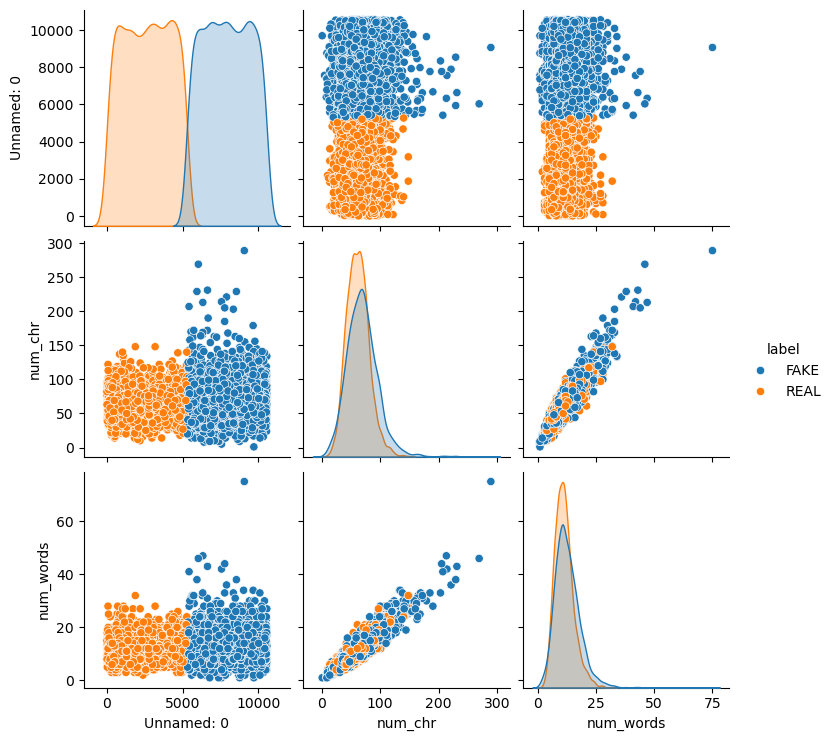

In [93]:
sns.pairplot(df,hue='label')

In [94]:
df1=df.drop(columns=['title','Unnamed: 0','text'])

In [95]:
from sklearn.preprocessing import LabelEncoder
encoder=  LabelEncoder()
encoder .fit_transform(df1["label"])

array([0, 0, 1, ..., 0, 1, 1], shape=(6335,))

In [96]:
df1['label']=encoder .fit_transform(df["label"])

In [97]:
df1.head(1)

,label,num_chr,num_words
0,0,28,7


In [98]:
df1.head()

,label,num_chr,num_words
0,0,28,7
1,0,85,16
2,1,43,9
3,0,84,18
4,1,48,10


<Axes: >

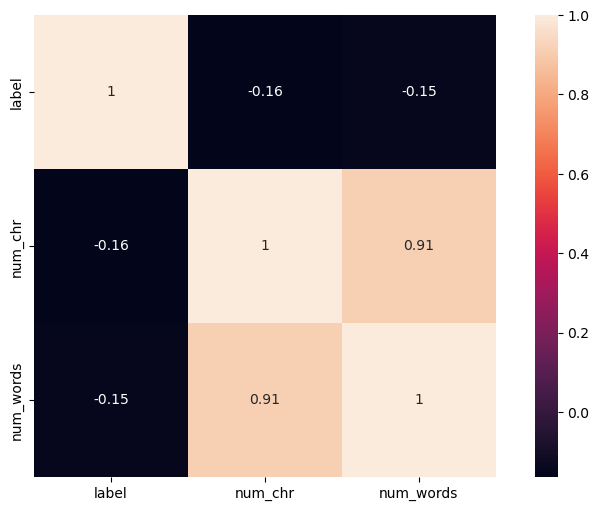

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr() , annot=True , square=True)

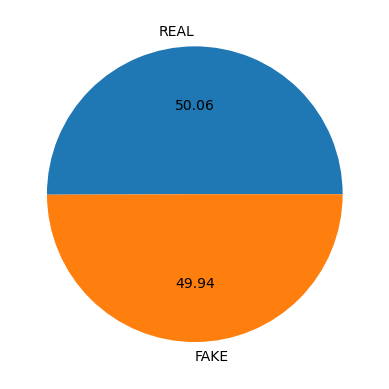

In [100]:
import matplotlib.pyplot as plt
plt.pie(df1['label'].value_counts(), labels=['REAL' , 'FAKE'] , autopct ='%0.2f')
plt.show()

In [101]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [102]:
df.shape

(6335, 6)

In [103]:
df.drop(columns=['Unnamed: 0','title'])

,text,label,num_chr,num_words
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,16
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,9
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,18
4,It's primary day in New York and front-runners...,REAL,48,10
...,...,...,...,...
6330,The State Department told the Republican Natio...,REAL,69,12
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59,16
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,66,9
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL,67,13


In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.3,random_state=5)

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [106]:
classifier = Pipeline([('tfidf' , TfidfVectorizer()), ('classifer' , RandomForestClassifier(n_estimators=100))])

In [107]:
classifier.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifer', RandomForestClassifier())])

In [108]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [109]:
def acc(y_pred , y_test):
  print(accuracy_score(y_pred , y_test))
  print(classification_report(y_pred , y_test))
  print(confusion_matrix(y_pred , y_test))

In [110]:
y_pre = classifier.predict(x_test)

In [111]:
acc(y_pre , y_test)

0.8921620199894792
              precision    recall  f1-score   support

        FAKE       0.90      0.88      0.89       950
        REAL       0.89      0.90      0.89       951

    accuracy                           0.89      1901
   macro avg       0.89      0.89      0.89      1901
weighted avg       0.89      0.89      0.89      1901

[[840 110]
 [ 95 856]]


In [119]:
classifier.predict(['The State Department told the Republican Nation'])

array(['FAKE'], dtype=object)